In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


data =np.array( [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])



X_data = data[:,:2]
Y_data = data[:,2:] 

In [2]:
learning_rate = 0.005
num_epochs = 1000
batch_size = 100
display_step = 1

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

# Model parameters
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable([0.0])

# Define the model
logits = tf.matmul(x, W) + b

# Loss function
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(loss)

# Accuracy
predict_op  = tf.greater_equal(logits, tf.zeros_like(logits))
correct_op  = tf.equal(tf.cast(predict_op, tf.float32), y)
accuracy_op = tf.reduce_mean(tf.cast(correct_op, tf.float32))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(loss)


In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Seed the random number generator for reproducibility
np.random.seed(0)

# Minimize the loss function
for epoch in range(num_epochs):
    # Present each data point once in random order
    idx = np.random.permutation(data.shape[0])
    for i in idx:
        feed_dict = {x: X_data[i:i+1], y: Y_data[i:i+1]}
        sess.run(train_op, feed_dict)

    if (epoch+1) % 100 == 0:
        feed_dict = {x: X_data, y: Y_data}
        accuracy = sess.run(accuracy_op, feed_dict)
        print("After {} epochs, cost = {}".format(epoch+1, accuracy))

# Print the result
W_val, b_val = sess.run([W, b])
W_val = W_val[:,0]
b_val = b_val[0]
print("W =", W_val)
print("b =", b_val)

def predict(x_):
    return 1 * sess.run(predict_op, {x: x_})


# Model predictions
labels = predict(X_data)[:,0]

# Find indices for the two species
idx_0, = np.where(labels == 0)
idx_1, = np.where(labels == 1)

# Plot the data
plt.plot(X_data[idx_0,0], X_data[idx_0,1], 'bo', label='I. fitted line')
plt.plot(X_data[idx_1,0], X_data[idx_1,1], 'ro', label='I. original data')

# Plot the separating hyperplane
x_sep = np.linspace(X_data[:,0].min(), X_data[:,0].max())
y_sep = (-b_val - W_val[0]*x_sep) / W_val[1]
plt.plot(x_sep, y_sep, 'm', label="Decision boundary")



After 100 epochs, cost = 1.0
After 200 epochs, cost = 1.0
After 300 epochs, cost = 1.0
After 400 epochs, cost = 1.0
After 500 epochs, cost = 1.0
After 600 epochs, cost = 1.0
After 700 epochs, cost = 1.0
After 800 epochs, cost = 1.0
After 900 epochs, cost = 1.0
After 1000 epochs, cost = 1.0
W = [ 1.85839558 -2.7104764 ]
b = -1.0244


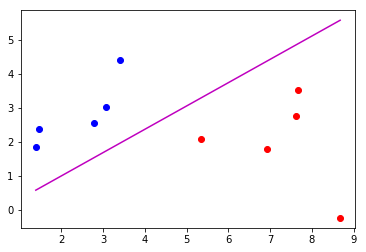

In [4]:
plt.show()